### Exercise: Convolutional Neural Networks

Read through the description of the exercises and select appropriate tools / libraries. Implement the solution below the respective exercise description. Feel free to use the internet, especially the documentation of the presented libraries may be helpful.

For this exercise, you will be using the fruit data from the last lecture on neural networks. The data contains three kinds of fruits, apples, bananas and oranges. The data includes 232 images of apples, 218 images of bananas and 206 images of oranges. With an overall size of 656 images the data set is therefore relatively small for a deep learning data set. However, the images are easily identifiable and the class distribution is balanced. The dimensions are different for each image.

#### Exercise 1
In this exercise, you will apply a convolutional neural network for the classification of the fruit data and compare the models performance to the neural network which was used for this task in the previous exercise.

* Load the fruit data and resize all images to the same dimensions
* Split the data into training, validation and test set at a reasonable ratio
* Create a convolutional neural network architecture capable of processing the fruit data
* Apply your training set to fit the CNN model and monitor its validation performance using the validation set
* Use at least 50 epochs and early stopping with reasonable parameters
* Evaluate the models test accuracy
* Display the models training and validation performance in terms of accuracy and loss at each epoch

* Is the model overfitted?
* How does the CNN perform in comparison to the classical neural network from the last lecture?

In [19]:
import os
import cv2
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# To display an image in jupyter, use PIL
from PIL import Image
from IPython.display import display

def display_array(array):
    if len(array.shape) > 2: # Check whether image is colored
        array = cv2.cvtColor(array.astype("uint8"), cv2.COLOR_BGR2RGB) # Swap BGR to RGB
    pil_img = Image.fromarray(array)
    display(pil_img)

In [8]:
# Load image data and labels into separate containers
data_dir = "Data/fruits"

string_labels = []
images = []
label_folders = os.listdir(data_dir)
for folder in label_folders:
    folder_path = os.path.join(data_dir, folder)
    filenames = os.listdir(folder_path)
    filepaths = [os.path.join(folder_path, name) for name in filenames]    
    print(filepaths[0])
    images += [cv2.resize(cv2.cvtColor(cv2.imread(file, 1), cv2.COLOR_RGB2BGR).astype(np.uint8),(100,100), interpolation = cv2.INTER_CUBIC) for file in filepaths]
    string_labels += [folder for _ in filenames]

images = np.array(images, dtype="object")
string_labels = np.array(string_labels)

print(len(images))
print(len(string_labels))
print(np.unique(string_labels))

Data/fruits\apples\Screen Shot 2018-06-08 at 4.59.36 PM.png
Data/fruits\banana\Screen Shot 2018-06-12 at 10.00.00 PM.png
Data/fruits\oranges\Screen Shot 2018-06-12 at 11.50.14 PM.png
656
656
['apples' 'banana' 'oranges']


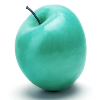

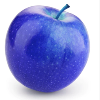

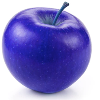

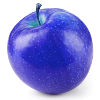

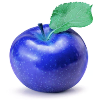

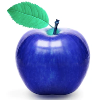

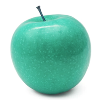

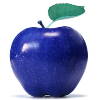

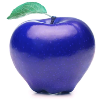

In [9]:
for i in range(1,10):
    display_array(images[i])

In [24]:
X_train, X_test_vali, y_train, y_test_vali = sklearn.model_selection.train_test_split(images, string_labels, test_size=0.3, random_state=42)
X_test, X_vali, y_test, y_vali = sklearn.model_selection.train_test_split(X_test_vali, y_test_vali, test_size=0.5, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(X_vali))

459
98
99


In [21]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(100,100,3), activation="relu", padding="same"))
model.add(layers.Conv2D(64, (3, 3), activation="selu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation="selu", padding="same"))
model.add(layers.Conv2D(64, (3, 3), activation="selu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="selu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="selu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="selu"))
model.add(layers.Dense(10, activation="softmax"))

# Create model
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=["accuracy"])    